# 勾配ブースティング

## gradient boosting回帰

### スクラッチで実装

勾配ブースティングのスクラッチ実装
1. クラス作成
2. コンストラクタ(__init__)作成
    - 引数：　学習率、イテレーション数、木の深さ、ランダムシード
3. 学習メソッド(fit)作成
    - 引数:　X,y
    - 初期モデルF0
    - 各決定木（fb(x)）を学習
4. 予測メソッド作成
    - 学習済みの決定機f1~b(x)およびF0から最終的な予測値Fbを計算

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

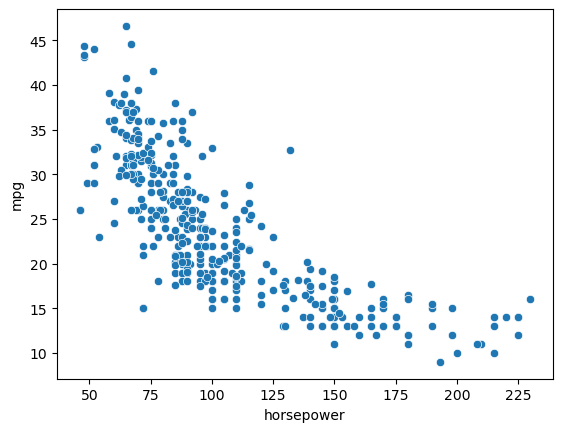

In [1]:
# サンプルデータの作成
import seaborn as sns
df = sns.load_dataset('mpg')
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values
sns.scatterplot(x=df['horsepower'], y=df['mpg'])

In [2]:
from sklearn.tree import DecisionTreeRegressor
class MyGradientBoostingRegressor:
    
    def __init__(self, learning_rate=0.03, n_estimators=100, max_depth=1, random_state=0):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []  # 弱学習器を格納する
        
    def fit(self, X, y):
        
        self.F0 = y.mean()
        Fb = self.F0
        
        for _ in range(self.n_estimators):
            # 残差を計算
            r = y - Fb
            
            # 決定木の弱学習器を作る
            estimator = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            
            # 残差を目的変数として学習
            estimator.fit(X, r)
            
            # Fbの計算
            # shrinkage(学習率)をかけて足し合わせていく
            # この時weightはNumPyArrayなので，Fbもイテレーション後はNumPyArrayになることに注意
            weight = estimator.predict(X)
            Fb += self.learning_rate * weight
            self.estimators.append(estimator)
    
    def predict(self, X):
        
        Fb = self.F0
        
        for estimator in self.estimators:
            Fb += self.learning_rate * estimator.predict(X)
            
        return Fb

In [3]:
my_gbr = MyGradientBoostingRegressor(learning_rate=0.4, n_estimators=100, max_depth=3, random_state=0)
my_gbr.fit(X, y)
my_gbr.predict(X)

array([15.2650035 , 14.88528543, 14.70255937, 14.70255937, 16.32090297,
       13.42891228, 13.96847764, 12.32275486, 13.3220807 , 14.44582303,
       14.45057947, 13.06144299, 14.70255937, 13.3220807 , 22.14197577,
       22.14197577, 22.16302756, 23.52344478, 25.05419126, 26.02566267,
       23.09677436, 24.36900225, 22.14197577, 25.78568677, 24.36900225,
       12.32275486, 10.12008802, 11.03517063,  9.16041365, 25.05419126,
       24.36900225, 22.14197577, 19.62275368, 20.47828127, 19.62275368,
       25.05419126, 19.62275368, 14.88528543, 13.4263758 , 14.10723671,
       14.70255937, 13.50887271, 14.45057947, 13.4263758 , 19.83194648,
       22.02939913, 19.62275368, 25.05419126, 24.12974936, 24.36900225,
       32.4610229 , 31.01322058, 35.51014157, 32.7376887 , 32.17168458,
       32.4610229 , 22.14197577, 28.52355739, 23.12922629, 24.36900225,
       24.12974936, 14.88528543, 13.4263758 , 14.70255937, 14.10723671,
       14.70255937, 11.03517063, 14.87296963, 13.06144299, 14.44

In [4]:
display(X[:5], y[:5])

array([[130.],
       [165.],
       [150.],
       [150.],
       [140.]])

array([18., 15., 18., 16., 17.])

### sklearnで実装

勾配ブースティング回帰
- sklearn.ensemble.GradienrtBoostingRegressorクラス
    1. インスタンス生成
        - n_estimators: モデルの数
        - learning_rate: 学習率
    2. .fit(X, y)で学習
    3. .predict()で予測

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.4, n_estimators=100, max_depth=3, random_state=0).fit(X, y)
# gbr.predict(X)

### スクラッチとsklearnの比較

In [6]:
display(my_gbr.predict(X)[:10], gbr.predict(X)[:10])

array([15.2650035 , 14.88528543, 14.70255937, 14.70255937, 16.32090297,
       13.42891228, 13.96847764, 12.32275486, 13.3220807 , 14.44582303])

array([15.2650035 , 14.88528543, 14.70255937, 14.70255937, 16.32090297,
       13.42891228, 13.96847764, 12.32275486, 13.3220807 , 14.44582303])

In [7]:
my_gbr.predict(X)[:10] == gbr.predict(X)[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### 決定木描画

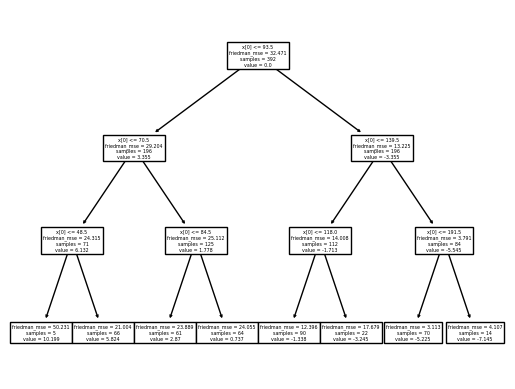

In [8]:
from sklearn.tree import plot_tree
model = gbr.estimators_[1][0]
_ = plot_tree(model)

In [9]:
lr = 0.4  # 学習率
results = []
idx = 0
for t in gbr.estimators_:
    result = t[0].predict([X[idx]])
    results.append(result*lr)

In [10]:
results[:5]

[array([-2.74940183]),
 array([-1.29810664]),
 array([-0.80943933]),
 array([-1.34415965]),
 array([-0.18368115])]

In [11]:
gbr.estimators_[:5]

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F82F605F140)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F82F605F140)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F82F605F140)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F82F605F140)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F82F605F140)]],
      dtype=object)

In [12]:
import numpy as np
F0 = np.mean(y)
Fb = F0 + np.cumsum(results)

# イテレーションを繰り返すことでFbがどんどん真の値に近づいていっている
print(Fb)

Fb = F0 + np.cumsum(results)[-1]
print(Fb)

[20.69651654 19.3984099  18.58897057 17.24481091 17.06112976 16.96054713
 16.39453633 16.36661911 16.03817952 16.02848306 15.97931915 15.97493656
 15.95061461 15.96221286 15.95905993 15.94390302 15.78454986 15.79897868
 15.79573759 15.79683527 15.56952973 15.57287788 15.56628953 15.56872033
 15.55812335 15.5580649  15.54824303 15.65677007 15.65530951 15.65830058
 15.6517756  15.65138639 15.66246608 15.65821936 15.48636019 15.48752281
 15.48265159 15.51027905 15.50959296 15.51150951 15.51501994 15.51594015
 15.51500155 15.51226981 15.50980812 15.51725323 15.52085639 15.52255284
 15.52578031 15.52525002 15.53229731 15.53181818 15.53162977 15.5326101
 15.53126878 15.5320825  15.53482053 15.53227931 15.53219772 15.53128152
 15.53261629 15.39956977 15.39665152 15.39597523 15.39645996 15.39609155
 15.39514133 15.39749177 15.39464896 15.39357412 15.31614447 15.31408465
 15.31372574 15.31396839 15.31426621 15.31365684 15.31333722 15.31131469
 15.3108153  15.31084979 15.30988143 15.30983436 15.

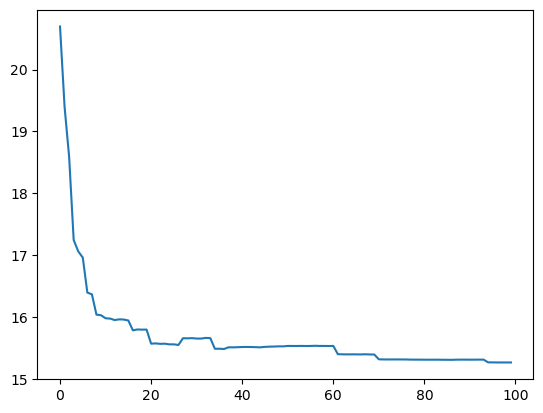

In [13]:
import matplotlib.pyplot as plt
Fb = F0 + np.cumsum(results)
plt.plot(Fb)

## gradient boosting分類

### スクラッチで実装

勾配ブースティング（分類）のスクラッチ実装
1. クラス作成
2. コンストラクタ(__init__)作成
    - 引数：　学習率、イテレーション数、木の深さ、ランダムシード
3. 学習メソッド(fit)作成
    - 引数:　X,y
    - 初期モデルF0
    - 各決定木（fb(x)）を学習
4. 予測メソッド作成
    - 学習済みの決定機f1~b(x)およびF0から最終的な予測値Fbを計算

In [14]:
# ヒント: それぞれの決定木は、17.85408163　or 29.0377551の値の葉に落ちる
model = DecisionTreeRegressor(max_depth=1, random_state=0).fit(X, y)
print(model.predict(X)[:50])  # 予測

[17.85408163 17.85408163 17.85408163 17.85408163 17.85408163 17.85408163
 17.85408163 17.85408163 17.85408163 17.85408163 17.85408163 17.85408163
 17.85408163 17.85408163 17.85408163 17.85408163 17.85408163 29.0377551
 29.0377551  29.0377551  29.0377551  29.0377551  17.85408163 17.85408163
 29.0377551  17.85408163 17.85408163 17.85408163 17.85408163 29.0377551
 29.0377551  17.85408163 17.85408163 17.85408163 17.85408163 29.0377551
 17.85408163 17.85408163 17.85408163 17.85408163 17.85408163 17.85408163
 17.85408163 17.85408163 17.85408163 29.0377551  17.85408163 29.0377551
 29.0377551  29.0377551 ]


In [15]:
# ヒント
# model.apply: それぞれの決定木がどの葉に行き着くか確認する
print(model.apply(X))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 1 2 2 2 2 1 1 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 1 2 1
 1 2 1 2 2 1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2
 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 2 1 1 2 1 2 2 1 1 1 1 1 1
 2 2 2 2 2 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2 2 2 2 2 1 1 2 1 2 1 2
 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1]


In [16]:
# ヒント
# predictの上書き
# 例：　[[29.0377551 ]]を3に上書きする
model.tree_.value[1, 0, 0] = 3

In [17]:
model.tree_.value

array([[[23.44591837]],

       [[ 3.        ]],

       [[17.85408163]]])

[Text(0.5, 0.75, 'x[0] <= 93.5\nsquared_error = 60.763\nsamples = 392\nvalue = 23.446'),
 Text(0.25, 0.25, 'squared_error = 38.676\nsamples = 196\nvalue = 3.0'),
 Text(0.75, 0.25, 'squared_error = 20.312\nsamples = 196\nvalue = 17.854')]

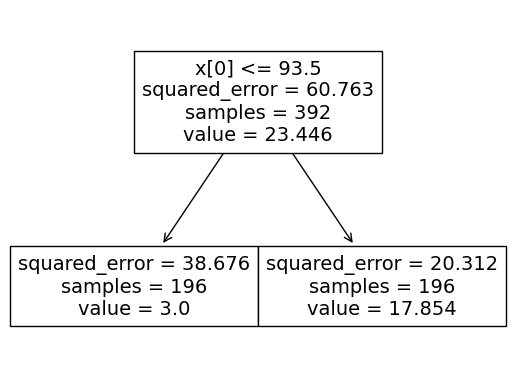

In [18]:
from sklearn.tree import plot_tree
plot_tree(model)

In [19]:
from sklearn.tree import DecisionTreeRegressor


class MyGradientBoostingClassifier:
    
    def __init__(self, learning_rate=0.03, n_estimators=100, max_depth=1, random_state=0):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []
        
    def fit(self, X, y):
        
        # F0は対数オッズ比
        self.F0 = np.log(y.mean()/(1-y.mean()))  #F0はスカラー
        F0 = np.full(len(y), self.F0)  # F0はnumpy_array
        Fb = F0
        
        # イテレーションで各決定木のFbを計算
        for _ in range(self.n_estimators):
            
            # 残差r = y - p
            # pは前回のFbとシグモイド関数を使って確率の形にする
            p = 1 / (1 + np.exp(-Fb))
            r = y - p
            
            # 残差rを目的変数としてモデル学習する(弱学習器)
            # ここで学習するのは、「分類」ではなく、「回帰」の決定木モデル
            estimator = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            estimator.fit(X, r)  # 弱学習器の目的変数は残差ｒ
            
            # 回帰の決定木が出力する値を上書きする
            # 葉のid
            X_leafs = estimator.apply(X)
            leaf_ids = np.unique(X_leafs)
            #　idごとのそれぞれの葉に処理
            for leaf_id in leaf_ids:
                # 弱出力器の出力の値を計算
                # fltrは葉のidに応じてフィルタする変数　,　leaf_idsは[1,2]なので2回ループ
                fltr = X_leafs == leaf_id  
                num = r[fltr].sum()  # 分子
                den = (p[fltr]*(1-p[fltr])).sum() # 分母
                estimator_pred_proba = num / den
                # 弱出力木を上書き
                estimator.tree_.value[leaf_id, 0, 0] = estimator_pred_proba
                # 該当データのFbを更新
                Fb[fltr] += self.learning_rate * estimator_pred_proba
                
            self.estimators.append(estimator)
            
    def predict_proba(self, X):
            
        Fb = np.full(X.shape[0], self.F0)  # numpy_array

        for estimator in self.estimators:
            Fb += self.learning_rate * estimator.predict(X)

        # 分類は最終的に確率の形にする
        return 1 / (1 + np.exp(-Fb))

In [20]:
# titanicのデータを使ってクラスを確認
# データ準備
df = sns.load_dataset('titanic')

# 欠損値削除
df.dropna(inplace=True)

# X,y生成
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
y = df['survived']

# ラベルエンコーディング
# .set_output(transform='pandas')：　oeがnumpyで返るのをpandasにする
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()
oe.set_output(transform='pandas')
X[cat_cols] = oe.fit_transform(X[cat_cols])

# 学習/テストデータ分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# クラスを確認
my_gbc = MyGradientBoostingClassifier(n_estimators=100, learning_rate=0.03, max_depth=1, random_state=0)
my_gbc.fit(X_train, y_train)

/tmp/ipykernel_93/2871757780.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_cols] = oe.fit_transform(X[cat_cols])


### sklearnで実装

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.03, max_depth=1, random_state=0).fit(X_train, y_train)
gbc.predict_proba(X_test)[:, 1] == my_gbc.predict_proba(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [22]:
# 評価
from sklearn.metrics import roc_auc_score
print(f"grad boost AUC: {roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])}")

grad boost AUC: 0.9407051282051282


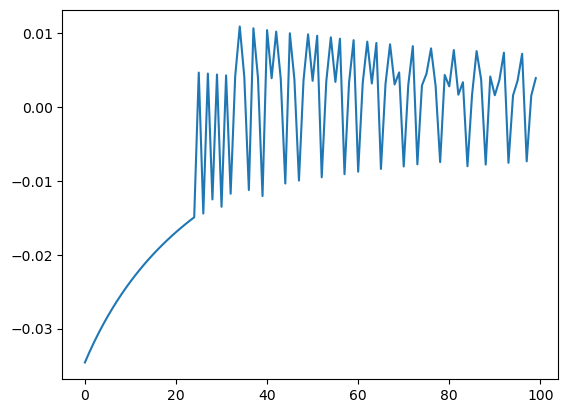

In [23]:
# 弱学習器の予測値からモデル全体の予測値が算出されることを確認する
lr = 0.03  # 学習率
results = []
for t in gbc.estimators_:
    result = lr * t[0].predict([X_test.iloc[0]])
    results.append(result)
plt.plot(results)

In [24]:
F0 = np.log(y_train.mean()/(1-y_train.mean()))
Fb = F0 + np.cumsum(results)[-1]
predict = 1 / (1 + np.exp(-Fb))
predict

0.551434197251246

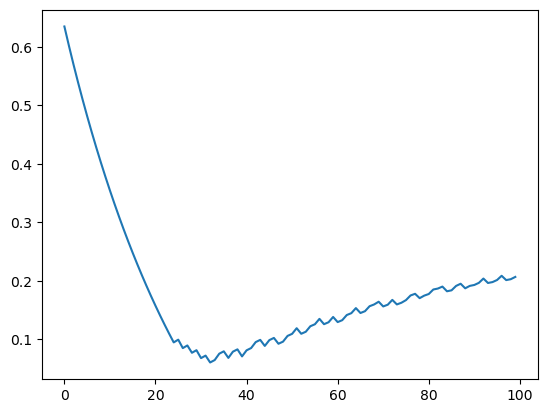

In [25]:
# 弱学習器の数に対しての予測値の推移を描画
plt.plot(np.cumsum(results)+F0)